In [65]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline


In [35]:
#reading the income & rent data 
income = pd.read_csv("C:\\Users\\rijwa\\Downloads\\COMP220 Proj\\Data Files\\IncomeandRent2016Analysis.csv", index_col = 0)
income.head()

,Count taxable income or loss,Average taxable income or loss,Median taxable income or loss,Count salary and wages,Average salary and wages,Median salary and wages,Count net rent,Average net rent,Median net rent,Count total income or loss,...,Median total business income,Count total business expenses,Average total business expenses,Median total business expenses,Count net tax,Average net tax,Median net tax,Count super total accounts balance,Average super total accounts balance,Median super total accounts balance
Postcode,,,,,,,,,,,,,,,,,,,,,
2000,24207,68607,25828,20465,52595,26186,2608,492,-420,24207,...,22080,1395,197860,14998,14304,35296,8571,44616,88340,1219
2006,79,82018,53192,66,84414,69154,20,4368,4148,79,...,37440,3,41247,37177,57,32740,19577,120,98720,19776
2007,4879,47040,31049,4275,47486,33284,519,-1026,-1654,4879,...,18532,320,149251,8214,3099,16119,9233,6952,42250,4267
2008,6025,82162,40289,5372,53977,42505,670,61,-906,6025,...,18000,494,30197,7579,4244,36981,10972,8081,55885,9029
2009,9763,84475,52414,8179,75281,56378,1679,-2595,-1393,9763,...,23795,673,93747,10851,7373,32797,15451,12889,131020,19841


In [3]:
print(income.columns)

Index(['Count taxable income or loss', 'Average taxable income or loss',
       'Median taxable income or loss', 'Count salary and wages',
       'Average salary and wages', 'Median salary and wages', 'Count net rent',
       'Average net rent', 'Median net rent', 'Count total income or loss',
       'Average total income or loss', 'Median total income or loss',
       'Count total deductions', 'Average total deductions',
       'Median total deductions', 'Count total business income',
       'Average total business income', 'Median total business income',
       'Count  total business expenses', 'Average total business expenses',
       'Median total business expenses', 'Count net tax', 'Average net tax',
       'Median net tax', 'Count super total accounts balance',
       'Average super total accounts balance',
       'Median super total accounts balance'],
      dtype='object')


In [158]:
#Using Median Values for all variables because https://surveymethods.com/when-is-it-generally-better-to-use-median-over-mean/#:~:text=Median%2C%20on%20the%20other%20hand%2C%20is%20the%2050%25,lot%20of%20analysis%2C%20the%20mean%20is%20very%20useful.
ato = pd.DataFrame(income, columns = ['Median taxable income or loss', 'Median salary and wages','Median net rent','Median total income or loss','Median total deductions','Median total business income', 'Median total business expenses', 'Median net tax','Median super total accounts balance'])

In [159]:
ato.head()

,Median taxable income or loss,Median salary and wages,Median net rent,Median total income or loss,Median total deductions,Median total business income,Median total business expenses,Median net tax,Median super total accounts balance
Postcode,,,,,,,,,
2000,25828,26186,-420,26811,280,22080,14998,8571,1219
2006,53192,69154,4148,54338,876,37440,37177,19577,19776
2007,31049,33284,-1654,32450,300,18532,8214,9233,4267
2008,40289,42505,-906,42123,392,18000,7579,10972,9029
2009,52414,56378,-1393,54867,567,23795,10851,15451,19841


In [112]:
atore = pd.DataFrame(income, columns = ['Median taxable income or loss', 'Median salary and wages','Median net rent','Median total income or loss','Median total deductions','Median total business income', 'Median total business expenses', 'Median net tax','Median super total accounts balance'])
atore.head()

,Median taxable income or loss,Median salary and wages,Median net rent,Median total income or loss,Median total deductions,Median total business income,Median total business expenses,Median net tax,Median super total accounts balance
Postcode,,,,,,,,,
2000,25828,26186,-420,26811,280,22080,14998,8571,1219
2006,53192,69154,4148,54338,876,37440,37177,19577,19776
2007,31049,33284,-1654,32450,300,18532,8214,9233,4267
2008,40289,42505,-906,42123,392,18000,7579,10972,9029
2009,52414,56378,-1393,54867,567,23795,10851,15451,19841


In [113]:
atore.rename(columns={'Median taxable income or loss': 'median_taxable_income_or_loss'}, inplace=True)

atore.rename(columns={'Median salary and wages': 'median_salary_and_wages'}, inplace=True)

atore.rename(columns={'Median net rent': 'median_net_rent'}, inplace=True)

atore.rename(columns={'Median total income or loss': 'median_total_income_or_loss'}, inplace=True)

atore.rename(columns={'Median total deductions': 'median_total_deductions'}, inplace=True)

atore.rename(columns={'Median total business income': 'median_total_business_income'}, inplace=True)

atore.rename(columns={'Median total business expenses': 'median_total_business_expenses'}, inplace=True)

atore.rename(columns={'Median net tax': 'median_net_tax'}, inplace=True)

atore.rename(columns={'Median super total accounts balance': 'median_super_total_accounts_balance'}, inplace=True)


In [114]:
atore.head()

,median_taxable_income_or_loss,median_salary_and_wages,median_net_rent,median_total_income_or_loss,median_total_deductions,median_total_business_income,median_total_business_expenses,median_net_tax,median_super_total_accounts_balance
Postcode,,,,,,,,,
2000,25828,26186,-420,26811,280,22080,14998,8571,1219
2006,53192,69154,4148,54338,876,37440,37177,19577,19776
2007,31049,33284,-1654,32450,300,18532,8214,9233,4267
2008,40289,42505,-906,42123,392,18000,7579,10972,9029
2009,52414,56378,-1393,54867,567,23795,10851,15451,19841


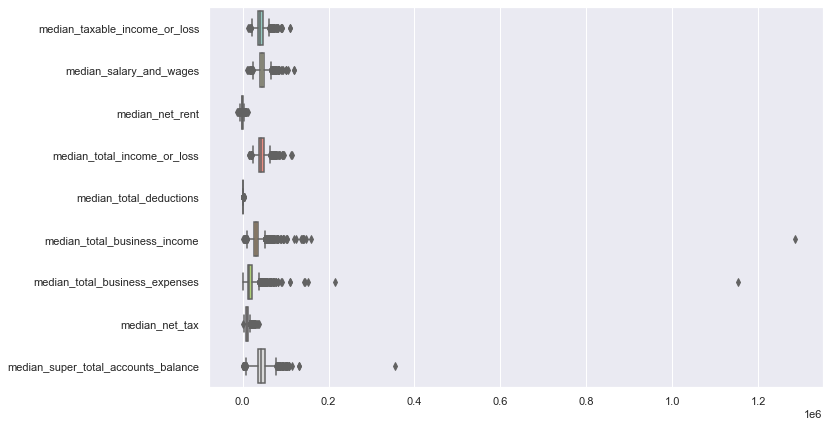

In [128]:
fig, scatter = plt.subplots(figsize = (11,7))
ax = sns.boxplot(data= atore, orient="h", palette="Set3")

<AxesSubplot:xlabel='median_taxable_income_or_loss', ylabel='Count'>

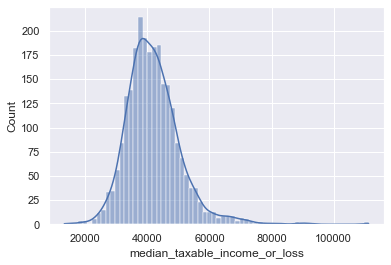

In [136]:
sns.histplot(data=atore, x="median_taxable_income_or_loss", kde=True)

<AxesSubplot:xlabel='median_salary_and_wages', ylabel='Count'>

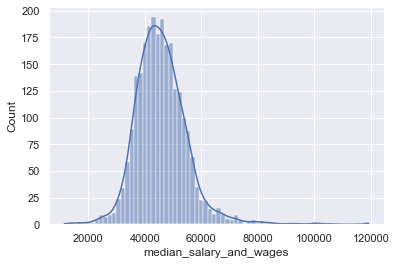

In [137]:
sns.histplot(data=atore, x="median_salary_and_wages", kde=True)

<AxesSubplot:xlabel='median_net_rent', ylabel='Count'>

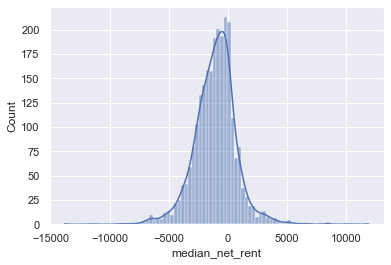

In [138]:
sns.histplot(data=atore, x="median_net_rent", kde=True)

<AxesSubplot:xlabel='median_taxable_income_or_loss', ylabel='Count'>

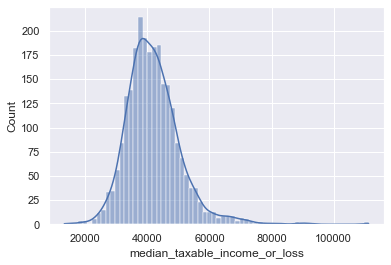

In [139]:
sns.histplot(data=atore, x="median_taxable_income_or_loss", kde=True)

<AxesSubplot:xlabel='median_total_deductions', ylabel='Count'>

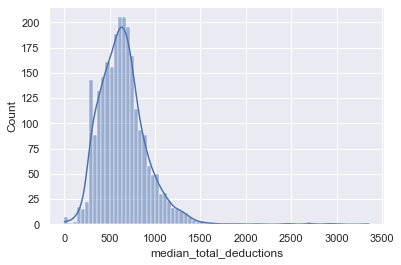

In [141]:
sns.histplot(data=atore, x="median_total_deductions", kde=True)

<AxesSubplot:xlabel='median_total_business_expenses', ylabel='Count'>

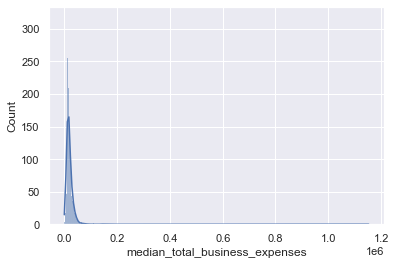

In [145]:
sns.histplot(data=atore, x="median_total_business_expenses", kde=True)

<AxesSubplot:xlabel='median_net_tax', ylabel='Count'>

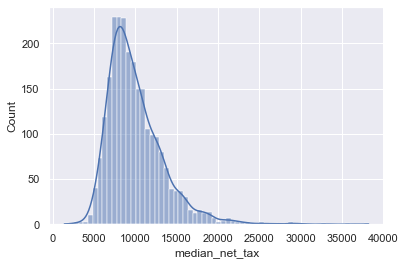

In [144]:
sns.histplot(data=atore, x="median_net_tax", kde=True)

<AxesSubplot:xlabel='median_super_total_accounts_balance', ylabel='Count'>

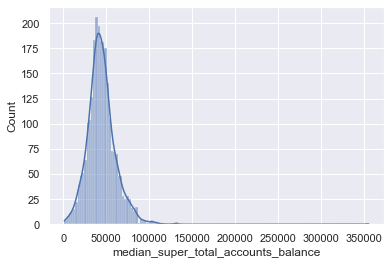

In [142]:
sns.histplot(data=atore, x="median_super_total_accounts_balance", kde=True)

Analysing Taxable Income

In [162]:
atoAnalysis = pd.DataFrame(income, columns = ['Median taxable income or loss', 'Median salary and wages','Median net rent','Median total income or loss','Median total deductions','Median total business income', 'Median total business expenses', 'Median net tax','Median super total accounts balance'])
atoAnalysis.head()

,Median taxable income or loss,Median salary and wages,Median net rent,Median total income or loss,Median total deductions,Median total business income,Median total business expenses,Median net tax,Median super total accounts balance
Postcode,,,,,,,,,
2000,25828,26186,-420,26811,280,22080,14998,8571,1219
2006,53192,69154,4148,54338,876,37440,37177,19577,19776
2007,31049,33284,-1654,32450,300,18532,8214,9233,4267
2008,40289,42505,-906,42123,392,18000,7579,10972,9029
2009,52414,56378,-1393,54867,567,23795,10851,15451,19841


In [163]:
#find Q1, Q3, and interquartile range for each column
Q1 = atoAnalysis.quantile(q=.25)
Q3 = atoAnalysis.quantile(q=.75)
IQR = atoAnalysis.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
atoAnalysis_clean = atoAnalysis[~((atoAnalysis < (Q1-1.5*IQR)) | (atoAnalysis > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
atoAnalysis_clean.shape

(89,3)

(89, 3)

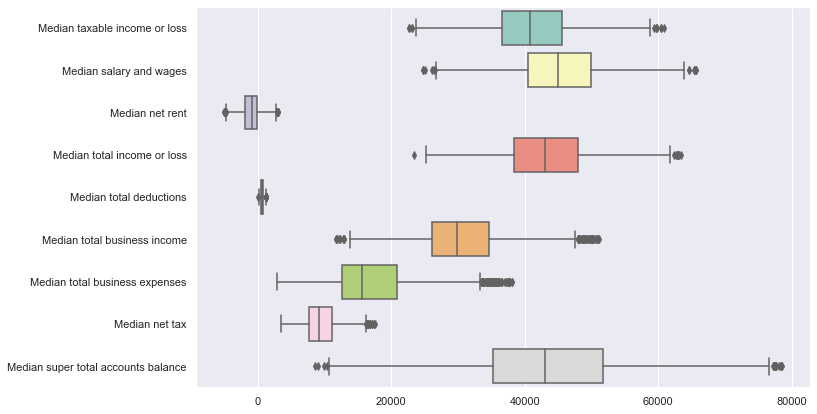

In [164]:
fig, scatter = plt.subplots(figsize = (11,7))
ax = sns.boxplot(data= atoAnalysis_clean, orient="h", palette="Set3")

<AxesSubplot:xlabel='Median total business income', ylabel='Count'>

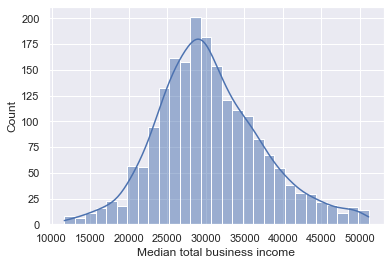

In [166]:
sns.histplot(data=atoAnalysis_clean, x="Median total business income", kde=True)

<AxesSubplot:xlabel='Median total business expenses', ylabel='Count'>

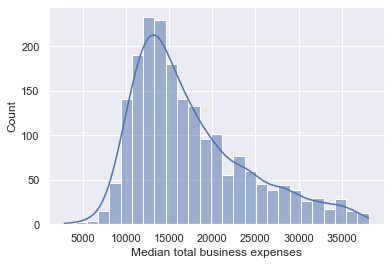

In [168]:
sns.histplot(data=atoAnalysis_clean, x="Median total business expenses", kde=True)

In [45]:
scaler = StandardScaler()
segementation_std = scaler.fit_transform(atoAnalysis_clean)
segementation_std

array([[-0.11150439, -0.40603613,  0.11646659, ..., -1.48633375,
         0.560795  , -2.58926579],
       [ 1.72370816,  1.63291781, -0.23217503, ..., -0.99614198,
         2.34374355, -1.78177632],
       [ 2.21108006,  2.00637574, -0.27512882, ..., -0.88542935,
         2.30473284, -1.7900663 ],
       ...,
       [-1.22322696, -2.01200813, -0.96095772, ..., -1.46491033,
        -1.62659109, -2.3071822 ],
       [ 0.18318912, -0.10547671, -2.04554101, ..., -1.72903261,
         0.96085378, -0.92731026],
       [ 1.92743567,  1.68479921, -2.66407563, ...,  0.38649245,
         1.53884916,  0.04172192]])

In [46]:
pca = PCA()
pca.fit(segementation_std)

PCA()

In [47]:
pca.explained_variance_ratio_

array([0.54768286, 0.1630952 , 0.10527338, 0.06489858, 0.05517822,
       0.03750208, 0.01529531, 0.01027522, 0.00079914])

Text(0, 0.5, 'Cumulative Explained Variance')

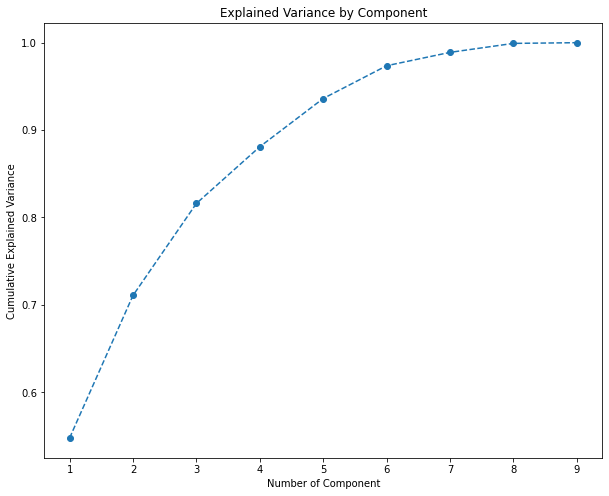

In [48]:
plt.figure(figsize = (10, 8))
plt.plot(range(1,10), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle  = '--')
plt.title ('Explained Variance by Component')
plt.xlabel('Number of Component')
plt.ylabel('Cumulative Explained Variance')

In [50]:
pca = PCA(n_components=3)

In [51]:
pca.fit(segementation_std)

PCA(n_components=3)

In [52]:
pca.transform(segementation_std)

array([[-0.3666109 ,  3.0470829 , -1.0158719 ],
       [ 3.1106955 ,  1.12061768, -1.11773512],
       [ 3.97900978,  0.84518902, -1.33695564],
       ...,
       [-2.33851873,  4.20954349, -1.16112246],
       [ 1.46960737,  1.80946914, -1.19462122],
       [ 3.83663545, -1.44783875, -1.92338273]])

In [94]:
score_pca = pca.transform(segementation_std)

In [95]:
score_pca.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [54]:
wcss = []

for i in range (1,21):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(score_pca)
    wcss.append(kmeans_pca.inertia_)

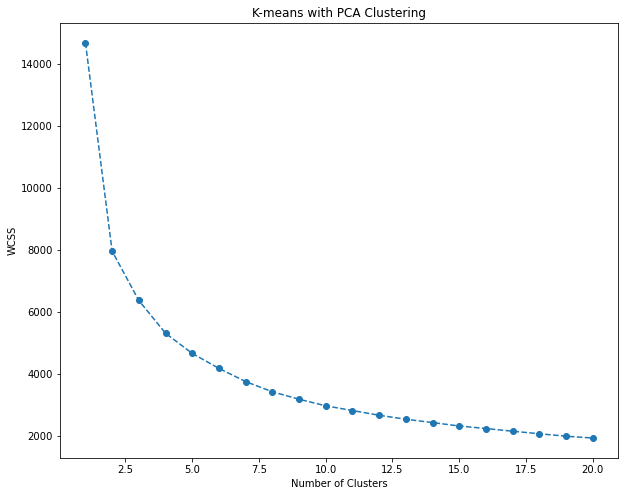

In [55]:
plt.figure(figsize = (10,8))
plt.plot(range(1,21), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [56]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [57]:
kmeans_pca.fit(score_pca)

KMeans(n_clusters=4, random_state=42)

In [59]:
df_segm_pca_kmeans = pd.concat([atoAnalysis_clean.reset_index(drop = True), pd.DataFrame(score_pca)], axis =1)
df_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [60]:
df_segm_pca_kmeans.head()

,Median taxable income or loss,Median salary and wages,Median net rent,Median total income or loss,Median total deductions,Median total business income,Median total business expenses,Median net tax,Median super total accounts balance,Component 1,Component 2,Component 3,Segment K-means PCA
0,40289,42505,-906,42123,392,18000,7579,10972,9029,-0.366611,3.047083,-1.015872,1
1,52414,56378,-1393,54867,567,23795,10851,15451,19841,3.110696,1.120618,-1.117735,2
2,55634,58919,-1453,58364,758,23726,11590,15353,19730,3.979010,0.845189,-1.336956,2
3,56494,58919,-195,59675,833,29414,13490,15926,21732,3.939273,-0.173989,-1.068864,2
4,54829,58561,-1008,57460,836,22960,10418,14100,23902,3.790368,0.932923,-0.935413,2


In [61]:
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0: 'first',
                                                                              1: 'second',
                                                                              2: 'third',
                                                                              3: 'fourth'})

C:\Users\rijwa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


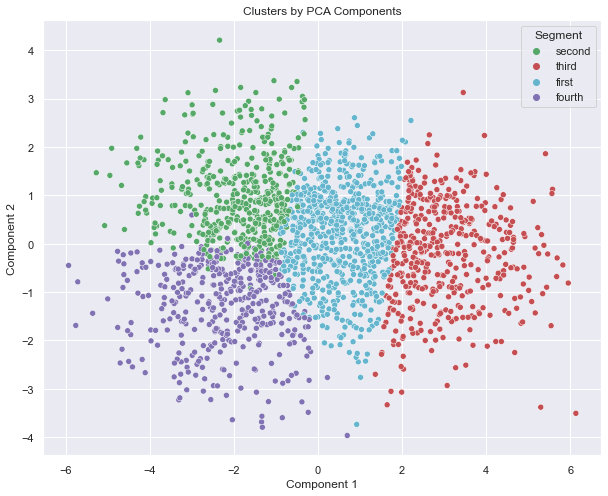

In [67]:
x_axis = df_segm_pca_kmeans['Component 1']
y_axis = df_segm_pca_kmeans['Component 2']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

In [69]:
dist = pdist(segementation_std, 'euclidean')
linkage_matrix = linkage(dist, method = 'complete')

Text(0, 0.5, 'Euclidean distance')

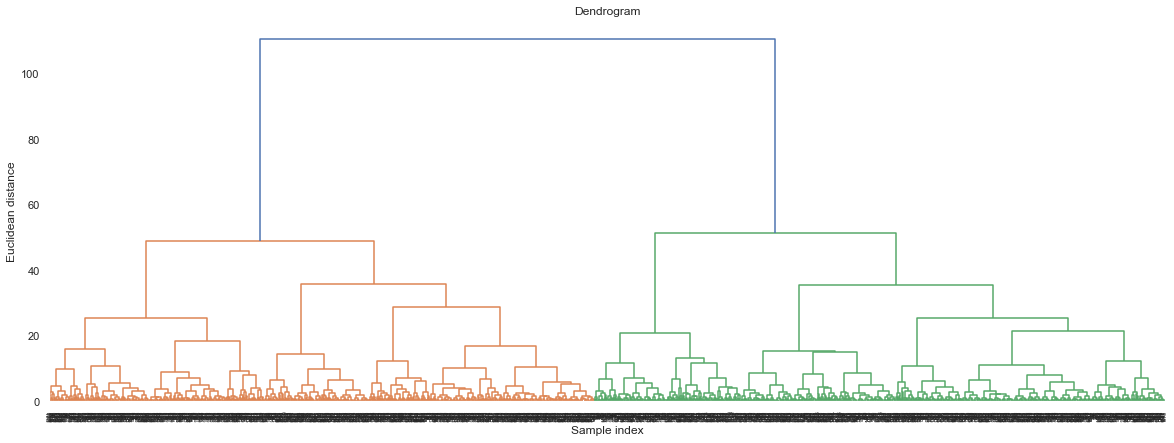

In [93]:
import scipy.cluster.hierarchy as sc

# Plot dendrogram
plt.figure(figsize=(20, 7))  
plt.title("Dendrograms")  

# Create dendrogram
sc.dendrogram(sc.linkage(score_pca, method='ward'))

plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')

In [98]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(
    n_clusters=2, affinity='euclidean', linkage='ward')

cluster.fit(score_pca)
labels = cluster.labels_
labels

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

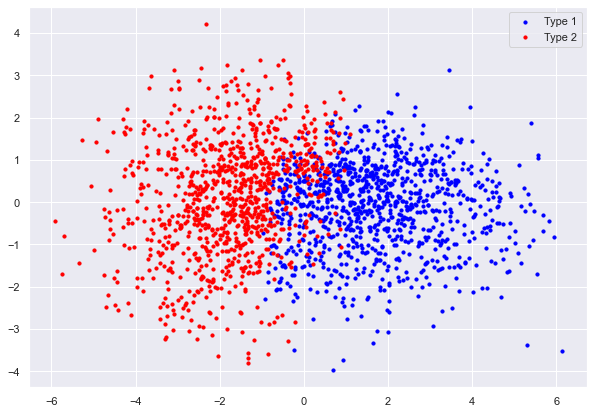

In [127]:
plt.figure(figsize=(10, 7))
plt.scatter(score_pca[labels == 0, 0], score_pca[labels == 0, 1], s = 10, c = 'blue', label = 'Type 1')
plt.scatter(score_pca[labels == 1, 0], score_pca[labels == 1, 1], s = 10, c = 'red', label = 'Type 2')
plt.legend()
plt.show()

Analysing Net Rent

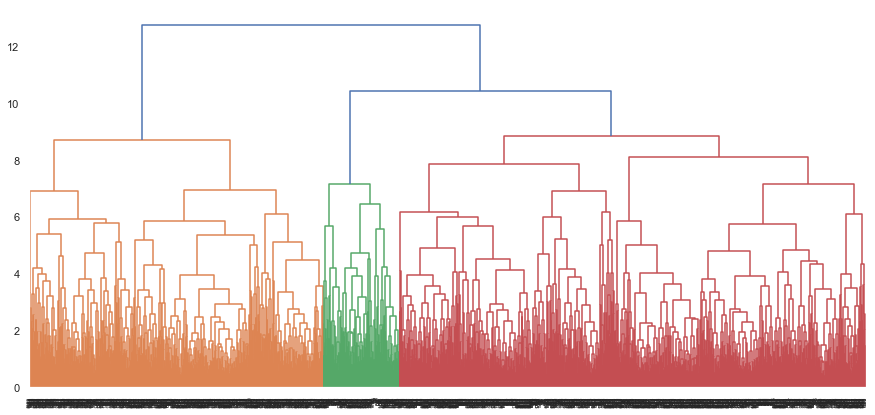

In [72]:
plt.figure(figsize=(15,7))
dendrogram(linkage_matrix)
plt.show()

Analysing Total Income or loss

Analysing Total Deductions 

Analysing Total Business Income

Analysing Total Business Expense

Analysing Net Tax

Analysing Super Total Accounts Balance 

The Median Taxable income seems normally distributed with a few outliers 